**LU1MEPY3 - Projet numérique**

# Chute libre de Felix Baumgartner

## Préambule

Felix Baumgartner, parachutiste autrichien, s'est lancé dans le vide à 39 km au-dessus de la Terre le 14 octobre 2012 : ce saut lui a permis de battre plusieurs records du monde dont celui d'avoir dépassé le mur du son avec une vitesse maximale atteinte de 377 m/s. La durée de la chute libre était de 4 min 20 s avant l'ouverture de son parachute à environ 2,5 km d'altitude. La durée totale du saut était de 9 min 3 s (voir le site web : https://www.redbull.com/int-en/projects/red-bull-stratos/). 

Il s'agit en particulier :
- de déterminer la vitesse maximale atteinte par Baumgartner lors de la chute libre en exploitant des résultats de mesure (partie 1) ; 
- de déterminer la vitesse maximale théorique lors de la chute libre en recourant à un modèle adéquat (partie 2) ; 
- de simuler le saut en chute libre de Baumgartner (partie 3).  

Le sujet est librement inspiré d'un texte de TD de l'UE LU1MEPY2 (UE de Mécanique-Physique du 2nd semestre).

<img src="Baumgartner.jpg" style="width:267px;height:400px"/>
Photographie : Jay Nemeth/Red Bull Content Pool

Thèmes : Forces (gravitationnelle, poids, traînée). Équilibre des forces. Loi des gaz parfaits

Outils / méthodes : matplotlib ; numpy ; interpolation ; boucles ; calcul d'erreurs et de statistiques ; méthode d'Euler-Cromer 

## Partie 1. Exploitation des données expérimentales

Felix Baumgartner, équipé de son scaphandre, présente une masse d'environ $m =$ 120 kg et une superficie de $S =$ 1,1  m$^{2}$. Le coefficient de traînée vaut $C_x =$ 0,7. Sa vitesse de norme $v_{\text{B}}$ et son altitude $z_{\text{B}}$ en tout instant $t$ du saut ont été mesurées.  

Dans cette première partie, nous commençons par étudier les données expérimentales qui permettront de déduire en particulier la vitesse maximale $v_{\text{Bmax}}$ de Baumgartner et les altitudes pour lesquelles sa vitesse $v_{\text{B}}$ dépasse la vitesse du son $v_{\text{son}}$.  

Commençons par importer les bibliothèques nécessaires :

In [141]:
import numpy as np
import matplotlib.pyplot as plt

Le fichier "Alt-Vit-Baumgartner.txt" est constitué des données de l'altitude $z_{\text{B}}$ (en m, 1$^{\text{ère}}$ colonne) et de la norme $v_{\text{B}}$ de la vitesse de Baumgartner (en km/h, 2$^{\text{ème}}$ colonne).   
Le fichier "Alt-Vit-son.txt" est constitué des données de l'altitude $z_{\text{son}}$ (en m, 1$^{\text{ère}}$ colonne) et de la vitesse du son $v_{\text{son}}$ dans l'air (en m/s, 2$^{\text{ème}}$ colonne). La vitesse du son $v_{\text{son}}$ dans l'air varie avec la température $T$ qui varie elle-même avec l'altitude $z_{\text{son}}$ : de $v_{\text{son}}= $ 340 m/s au niveau de la mer ($z_{\text{son}} = $ 0 et à $T = $ 15°C), elle diminue dans la troposphère (jusqu'à 11 km d'altitude) pour atteindre un palier à $v_{\text{son}}= $  295 m/s dans la stratosphère basse (entre 11 et 25 km d'altitude, $T = -$56,5°C) puis remonte dans la stratosphère haute (au delà de 25 km d'altitude) : ainsi $v_{\text{son}}= $ 303 m/s à $z_{\text{son}} =$ 32 km (où $T = -$45°C) par exemple.   

**Question 1.a**  

Tracer les courbes de $v_{\text{B}}$ et de $v_{\text{son}}$ en fonction de l'altitude sur le même graphe. Inverser l'axe des abscisses (altitudes décroissantes) en utilisant la fonction "matplotlib.pyplot.axis()" (voir https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html).

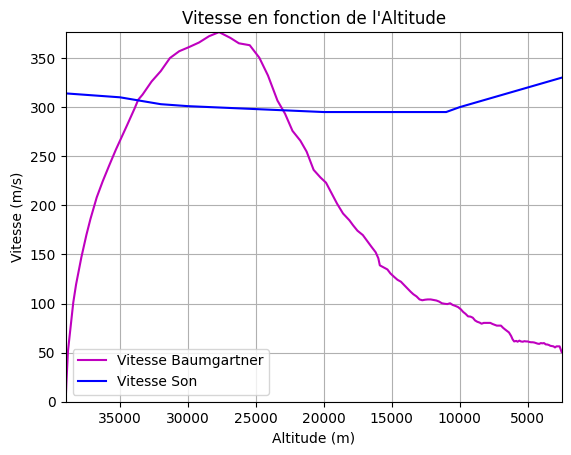

In [142]:
coord_b = np.loadtxt('Alt-Vit-Baumgartner.txt')
coord_son = np.loadtxt('Alt-Vit-son.txt')

zB = coord_b[:,0]
vB = coord_b[:,1] / 3.6

zS = coord_son[:,0]
vS = coord_son[:,1]

plt.axis([max(zB), min(zB),min(vB),max(vB)]) 
plt.plot(zB, vB, '-m',label='Baumgartner')
plt.plot(zS, vS, '-b',label='Son') 
plt.grid()
plt.title("Vitesse en fonction de l'Altitude")
plt.xlabel('Altitude (m)')
plt.ylabel ('Vitesse (m/s)')
plt.legend(['Vitesse Baumgartner', 'Vitesse Son'])
plt.show()


**Question 1.b**  

Quelle est la vitesse maximale $v_{\text{Bmax}}$ atteinte par Baumgartner ? A quelle altitude $z_{\text{Bm}}$ correspond cette vitesse maximale ? 

In [143]:
vB_max = max(vB)
zB_max = zB[np.argmax(vB)]

print(f"La vitesse max est{vB_max : .1f} m/s atteint à l'altitude {zB_max} m")


La vitesse max est 376.4 m/s atteint à l'altitude 27710.0 m


**Question 1.c** 

Calculer sa vitesse moyenne jusqu'à 20 km d'altitude, puis sur toute la chute libre (avant ouverture du parachute à 2,5 km d'altitude).


In [144]:
c = 0 
i = 0 
while c < 20000:
    c = zB[i]
    i += 1

#Calcule pour la vitesse moyenne jusqu'a 20 km 
vB_moyenne_20 = np.mean(vB[i:])
vB_moyenne = np.mean(vB)

print(f"Vitesse moyenne jusqu'à 20km est{vB_moyenne_20 : .1f} m/s")
print(f"Vitesse moyenne sur toute la chute libre est{vB_moyenne : .1f} m/s")

Vitesse moyenne jusqu'à 20km est 262.4 m/s
Vitesse moyenne sur toute la chute libre est 141.0 m/s


**Question 1.d**  

Déterminer les altitudes pour lesquelles Baumgartner se déplace à une vitesse supersonique ($v_{\text{B}}\geq v_{\text{son}}$). Pour ce faire, procéder de la façon suivante : 

i) Les valeurs d'altitude pour la vitesse de Baumgartner doivent correspondre aux valeurs d'altitude pour la vitesse du son. On commence par choisir des valeurs d'altitude régulièrement espacées de 100 m sur l'intervalle considéré de la chute libre (de 39 km à 2,5 km) ; on utilise la fonction "numpy.linspace()". Voir https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

ii) Puis, les valeurs de vitesse de Baumgartner et de vitesse de son doivent être interpolées pour les valeurs d'altitude précédemment choisies ; on utilise la fonction "numpy.interp()". Voir : https://fr.wikibooks.org/wiki/Python_pour_le_calcul_scientifique/Interpolation,_extrapolation_et_lissage ; https://numpy.org/doc/stable/reference/generated/numpy.interp.html

iii) Enfin, on recherche les valeurs d'altitude pour lesquelles les valeurs interpolées de vitesse de Baumgartner sont supérieures ou égales aux valeurs interpolées de vitesse du son ; on utilise la fonction "numpy.nonzero()". Voir : https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html#numpy.nonzero

La Vitesse de Baumgartner est supersonique entre 33600.0 m et 23100.0 m


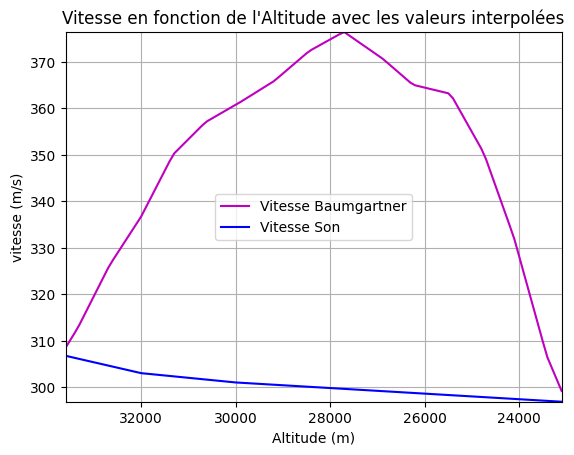

In [145]:
#Question i 
zB_start = int(zB[-1])
zB_end = int(zB[0])
zB_reg100 = np.linspace(zB_start, zB_end, num = (zB_start - zB_end) // 100 + 1)

#Question ii
vB_interp = np.interp(zB_reg100, zB, vB)
vS_interp = np.interp(zB_reg100, zS, vS)

#Question iii
v_indices = np.nonzero(vB_interp >= vS_interp)[0] 

zB_superiorVS = zB_reg100[v_indices]
vB_superiorVS = vB_interp[v_indices]
vS_superior   = vS_interp[v_indices]

print("La Vitesse de Baumgartner est supersonique entre", np.max(zB_superiorVS), "m et",np.min(zB_superiorVS), "m")

plt.axis([max(zB_superiorVS),min(zB_superiorVS),min(vS_superior),max(vB_superiorVS)])
plt.plot(zB_superiorVS, vB_superiorVS, '-m',label='Baumgartner')
plt.plot(zB_superiorVS, vS_superior, '-b',label='Son') 
plt.grid()
plt.title("Vitesse en fonction de l'Altitude avec les valeurs interpolées")
plt.xlabel('Altitude (m)')
plt.ylabel ('vitesse (m/s)')
plt.legend(['Vitesse Baumgartner', 'Vitesse Son'])
plt.show()

## Partie 2. Modélisation de la chute libre

### 2.1 Bilan des forces - Modèle avec la masse volumique constante

Lors de sa chute libre, Baumgartner est soumis à l'action de deux forces extérieures : son poids $\vec{P}$ et la force de traînée $\vec{F_\text{t}}$.  

#### a) Force de pesanteur

On choisit un axe (O$z$) vertical, dont l'origine O se situe à la surface de la Terre, orienté vers le ciel et de vecteur unitaire $\vec{u}_z$. On appelle $\mathcal{G}$ la constante gravitationnelle, $M_\text{T}$ la masse de la Terre et $R_\text{T}$ le rayon de la Terre.

Il s'agit ici d'exprimer la fonction "AccPes(z)" permettant de calculer la composante $g_{z}$ du vecteur accélération de la pesanteur $\vec{g}$ en fonction de l'altitude $z$. Pour cela, vous procéderez ainsi :  
i) à partir de l'expression de la force gravitationnelle, exprimer la composante $P_z$ du poids $\vec{P}$ de Baumgartner ;  
ii) en déduire la fonction "AccPes(z)" permettant de calculer la composante $g_z$ du vecteur accélération de la pesanteur $\vec{g}$ en fonction de l'altitude $z$.


**Question n°2.a**

Écrire la fonction **AccPes(z)**.

In [146]:
G = 6.674E-11 #Constante gravitationnelle
M_T = 5.972E24 #Masse de la Terre
R_T = 6.371E6 #Rayon de la Terre

def AccPes(z):
    return -G * M_T / (R_T + z)**2

**Question n°2.b**

Calculer $g_z$ pour quelques valeurs de $z$ comprises entre la surface du sol et l'altitude $z = $ 39 km (par pas de 5 km par exemple). Commenter la dépendance de l'accélération de la pesanteur avec l'altitude. 

In [147]:
altitudes = np.arange(0, 40000, 5000)  # en mètres
g_values = AccPes(altitudes)

for z, g in zip(altitudes, g_values):
    print(f"Altitude: {z} m, gZ: {g:.4f} m/s^2")
    
print(f"Altitude: {39000} m, gZ: {AccPes(39000):.4f} m/s^2")


Altitude: 0 m, gZ: -9.8195 m/s^2
Altitude: 5000 m, gZ: -9.8041 m/s^2
Altitude: 10000 m, gZ: -9.7888 m/s^2
Altitude: 15000 m, gZ: -9.7735 m/s^2
Altitude: 20000 m, gZ: -9.7582 m/s^2
Altitude: 25000 m, gZ: -9.7429 m/s^2
Altitude: 30000 m, gZ: -9.7277 m/s^2
Altitude: 35000 m, gZ: -9.7125 m/s^2
Altitude: 39000 m, gZ: -9.7004 m/s^2


#### b) Force de traînée

La force de traînée $\vec{F_\text{t}}$ est la force de frottement exercée par l'air sur le corps de Baumgartner. Elle dépend entre autres de la vitesse $v_{\text{B}}$ de Baumgartner et de la masse volumique de l'air $\rho$ supposée ici constante.  

Il s'agit de définir la fonction **Frott(v,rho)** permettant de calculer la composante $F_{\text{t}z}$ du vecteur force de traînée $\vec{F_\text{t}}$ en fonction de $v_{\text{B}}$ et $\rho$. 

In [148]:
#Commentaire sur les valeurs de gZ
#On fait la remarque que la valeur de gZ diminue avec l'altitude d'une façon très faible
#Et à cause de cela on peut négliger l'acelleration de la pesanteur par rapport à l'altitude

**Question n°2.c**

Écrire la fonction **Frott(v,rho)**.

In [149]:
Cx = 0.7
S = 1.1

def Frott(v, rho):
    return 0.5 * rho ** S * Cx * v**2 

#### c) Condition d'équilibre et vitesse maximale atteinte dans le cadre du modèle "masse volumique de l'air constante"

À partir de la condition d'équilibre des forces, projetée selon l'axe (O$z$), il est possible de déduire l'expression de la vitesse maximale que peut atteindre Baumgartner. Il s'agit ici de calculer cette vitesse en utilisant un modèle dans lequel la masse volumique de l'air est supposée constante ainsi que l'accélération de la pesanteur ($g_z = -$9,75 m/s$^2$). Vous choisirez comme valeur de $\rho$ la valeur typique de la masse volumique de l'air à 15°C au niveau de la mer. La vitesse maximale ainsi calculée sera comparée à la vitesse maximale mesurée (Question 1.b).

**Question n°2.d**

Calculer la valeur numérique de la vitesse maximale théorique $v_\text{Bm-th}$. Comparer avec la valeur mesurée $v_\text{Bmax}$ et conclure.


In [150]:
#Condition d'equilibre du systeme: P + F = 0
g = 9.75 #m/s²
rho = 1.225 #kg/m³
m = 120 #kg
P = m * g #N

vB_maxth = ( 2 * abs(P) / (rho * Cx * S)) ** 0.5 #m/s

print(f"La vitesse max theorique est{vB_maxth : .1f} m/s") 
print(f"La difference entre la vitesse maximale mesurée et la vitesse max theorique est{vB_max - vB_maxth : .1f} m/s")
print(f"Cela est une difference considerable.")
print(f"Donc on peut pas utiliser cette modèle pour décrire la chute libre de Baumgartner avec precision")

La vitesse max theorique est 49.8 m/s
La difference entre la vitesse maximale mesurée et la vitesse max theorique est 326.6 m/s
Cela est une difference considerable.
Donc on peut pas utiliser cette modèle pour décrire la chute libre de Baumgartner avec precision


### 2.2. Bilan des forces - Modèle avec variations de la masse volumique de l'air avec l'altitude 

La pression $p$, la température $T$ et la masse volumique de l’air $\rho$ varient avec l’altitude $z$. En particulier, $\rho$ décroit rapidement quand $z$ augmente.  

#### a) $\rho= f(z)$ : courbe expérimentale

##### **Question 2.e**  

Le fichier "Alt-Masse-vol.txt" est constitué des données de l'altitude $z$ (en m, 1$^{\text{ère}}$ colonne) et de la masse volumique $\rho$ (kg/m$^3$, 2$^{\text{ème}}$ colonne). Tracer la courbe $\rho = f(z)$.


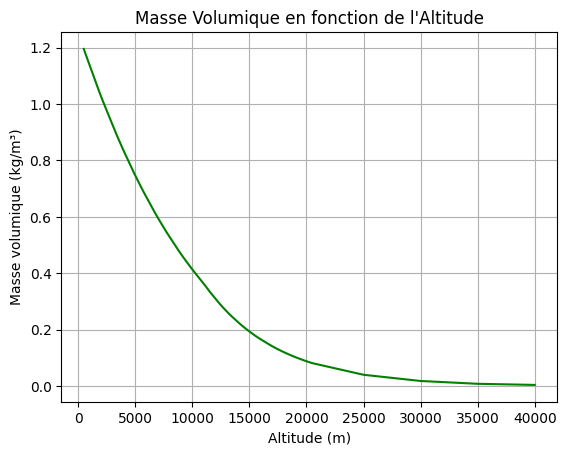

In [151]:
coord_MV = np.loadtxt('Alt-Masse-vol.txt')

plt.plot(coord_MV[:,0], coord_MV[:,1], 'g')
plt.xlabel('Altitude (m)'), plt.ylabel('Masse volumique (kg/m³)')
plt.title("Masse Volumique en fonction de l'Altitude")
plt.grid()
plt.show()



#### b) $\rho(z)$ : modèle d'atmosphère

##### **Question 2.f** 

En partant de la loi des gaz parfaits, déterminer l'expression de la masse volumique $\rho(z)$ en fonction en particulier de la pression $p(z)$ et de la température $T(z)$.

##### **Question 2.g**  

Nous allons ici étudier les variations de la masse volumique en fonction de l'altitude en utilisant les modèles adéquats décrivant $p(z)$ et $T(z)$.

**Dans la troposphère ($z\leqslant$ 11 km)**, c'est le modèle à gradient de température constant qui est le mieux adapté : $T(z) = T_0+\alpha_{\text{T}} z$ avec $T_0 =$ 15°C et $\alpha_{\text{T}} = -$0.0065 K/m. 
Ainsi, la pression s'écrit : $p(z) = p_{0} \left({\frac{T_0}{T(z)}}\right)^{\frac{Mg}{\mathcal{R}\alpha_{\text{T}}}}$. $p_{0}$ et $T_0$ sont respectivement les pression et température au niveau du sol. $\mathcal{R}$ est la constante des gaz parfaits.  

Au delà de la troposphère, on pénètre dans la **stratosphère basse (11 km $\lt z \leqslant$ 25 km)**, dans laquelle la température reste quasiment constante ($T_1 = -$56.5°C). Le modèle à appliquer est donc celui de l'atmosphère isotherme. Ainsi, $\rho(z) = \frac{M }{\mathcal{R} T_1}p(z) $ avec la pression $p(z) = p_{1} \exp{\left(-\frac{Mg}{\mathcal{R}T_1}(z - z_1)\right)}$. $p_{1}$ est la pression à $z_1=11$ km. 

**Enfin, dans la stratosphère haute ($z \gt$ 25 km)**, la température croît linéairement selon la relation suivante :  $T$(°C) $= -$131,25 + 0.00299$z$. C'est à nouveau le modèle à gradient de température qui est le mieux adapté pour traduire l'évolution de $\rho(z)$ dans cette zone d'atmosphère.

Nous négligerons la dépendance de l'accélération de la pesanteur avec l'altitude ; on fixe la norme de $\vec{g}$ à $g=$ 9,75 m/s$^2$. Écrire la fonction **MassVol_th(z)**.

--

In [152]:
def MassVol_th(z):
    m_air = 28.966E-3 #Kg/mol
    R = 8.314 #J/(mol*K)
    
    alphaT = -0.0065         
    alphaS = 0.00299 
    
    #z = 0 
    T0 = 15 + 273.15 #K 
    P0 = 101325 #Pa
    
    # z <= 11 km 
    P1 = P0 * (T0 / (T0 + alphaT*11000))**(m_air * np.abs(AccPes(11000)) / (R * alphaT)) 
    T1 = -56.5 + 273.15 #K
    
    #z  > 25 km
    P2 = P1 * np.exp((-(25000-11000) * m_air * g) / (R * T1)) 
    
    #Troposphère z <= 11km 
    if z <= 11000:
        T = T0 + alphaT * z
        P = P0 * (T0 / T) ** (m_air * g / (R * alphaT))
    
    #Stratosphère Base 11km < z <= 25km 
    #On dit que après la temperature est presque constante donc:
    elif(z <= 25000):
        T = T1
        P = P1 * np.exp((-(z-11000) * g * m_air) / (R * T))
    
    #Stratosphère Haute z > 25km 
    else:
        T = -131.25 + alphaS * z + 273.15 #K
        P = P2  * (T1 / T) ** (m_air * g / (R * alphaS))  
        
    return  m_air * P / (R * T) 
    


**Question 2.h** 

Tracer la courbe expérimentale et celle du modèle de la masse volumique de l'air de 0 à 40 km d'altitude sur le même graphe.

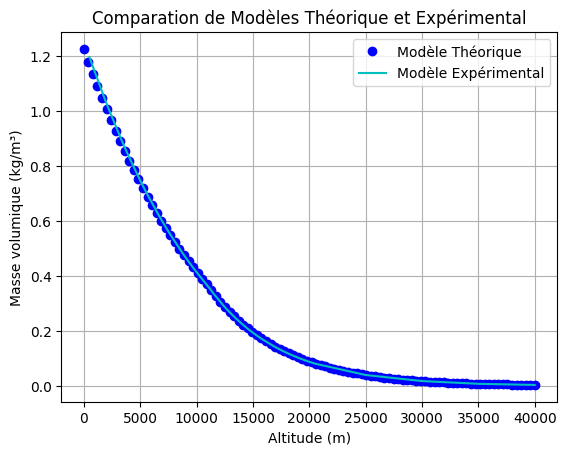

In [153]:
z_coord_th = np.linspace(0, 40000, 100)
MassVol_th_coord = [MassVol_th(i) for i in z_coord_th] 

plt.plot(z_coord_th, MassVol_th_coord, 'bo', label = 'Modèle Théorique')
plt.plot(coord_MV[:,0], coord_MV[:,1], 'c', label = 'Mesures')
plt.xlabel("Altitude (m)")
plt.ylabel("Masse volumique (kg/m³)")
plt.title("Comparation de Modèles Théorique et Expérimental")
plt.legend(['Modèle Théorique', 'Modèle Expérimental'])
plt.grid()
plt.show()

**Question 2.i** 

Déterminer la nouvelle vitesse maximale théorique $v_\text{Bm-th-new}$ atteinte par Baumgartner. Comparer avec la valeur mesurée $v_\text{Bmax}$ et conclure.

#### S'il vous reste encore du temps...

## Partie 3. Simulation de la chute libre de Felix Baumgartner 

Il s'agit ici de simuler la chute libre de Felix Baumgartner qui s'est élancé sans vitesse initiale.  
Nous allons d'abord définir la fonction qui permet de calculer l'accélération de Baumgartner.   
Puis par une méthode de discrétisation (méthode d'Euler-Cromer), nous allons simuler son accélération, sa vitesse et son altitude au cours du temps de chute.   
Nous terminerons par une analyse des résultats de simulation.

### 3.1 Accélération

Nous avons défini précédemment la fonction permettant de modéliser la dépendance de la masse volumique de l'air avec l'altitude (§ 2.2). Nous rappelons que la masse volumique intervient dans l'expression de la force de traînée (§ 1.2). Nous allons ici déterminer la fonction **"Accel(z,v)"** permettant de déterminer l'accélération de Baumgartner au cours de sa chute libre.

**Question n°3.a**

À partir de la relation fondamentale de la dynamique, écrire la fonction **Accel(z,v)**, permettant de calculer la composante $a_z$ de l'accélération $\vec{a}$ de Baumgartner au cours de sa chute libre. On néglige la dépendance de l'accélération de la pesanteur avec l'altitude ; on fixe la norme de $\vec{\mathrm{g}}$ à g = 9,75 m/s$^2$.

### 3.2 Méthode d'Euler-Cromer

Il s'agit ici de simuler le mouvement de Baumgartner, c'est-à-dire déterminer son accélération, sa vitesse et sa position en fonction du temps. Accélération et vitesse changent constamment au cours du temps de chute. Mais si on les regarde sur un très petit pas de temps, on peut les considérer constantes. En appliquant ce principe, il est possible de calculer une longue série de mouvements linéaires à vitesse constante, et d'obtenir ainsi des résultats étonnamment précis. La méthode d'Euler-Cromer est une méthode numérique appliquant ce principe.

La méthode d'Euler-Cromer produit une solution discrète approximative par itérations successives :   
    $v_{i+1} = v_i + Accel(z_i, v_i) * \Delta t$  
    $z_{i+1} = z_i + v_{i+1} * \Delta t$  
où Δt est le pas de temps. 

Pour mettre en oeuvre cette méthode, il faut commencer par définir le nombre d'itérations ($i$ varie de 0 à $n$) ainsi que le pas de temps (Δ$t$) : il est conseillé de prendre $n =$ 5000 et Δ$t$ = 52 ms. Les valeurs d'accélération, vitesse et altitude de Baumgartner en fonction du temps seront stockées dans des tableaux qu'il faudra donc créer au préalable. Il faudra également définir l'altitude de départ.

**Question n°3.b**

Mettre en oeuvre la méthode d'Euler-Cromer pour déterminer les composantes $a_z$ de l'accélération et $v_z$ de la vitesse ainsi que l'altitude $z$ de Baumgartner en fonction du temps $t$ de chute libre. 

**Question n°3.c**

Tracer sur trois graphes placés côte-à-côte les courbes de simulation donnant $z=f(t), v_z=f(t)$ et $a_z = f(t)$. 

### 3.3 Analyse des résultats de simulation

**Question n°3.d**

Quelle est l'altitude atteinte par Baumgartner au moment de l'ouverture de son parachute ? Comparer avec la valeur mesurée.

**Question n°3.e**

Tracer sur un même graphe les courbes de vitesse expérimentale (fichier "Temps-Vit-Baumgartner.txt" ; 1ère colonne : temps en s ; 2ème colonne : vitesse en m/s) et vitesse simulée en fonction du temps de chute libre. Quelle est la vitesse maximale obtenue par simulation ? Comparer avec la valeur mesurée.

**Question n°3.f**

Tracer l'histogramme des erreurs relatives entre courbes de vitesse expérimentale et vitesse simulée. 

**Question n°3.g**

Commenter les points suivants de la courbe de l'accélération : valeur initiale, valeur nulle et valeur finale.